In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100
theta = np.array([0,0, 0])
theta0 = 0

#x = np.array([[-1,-1], [1,0], [-1,10]])
#x = np.array([[-1,0], [0,1]])
#x = np.array([[0,1, 2], [-1,0, -1], [1, 0, 3]])
#x = np.array([[1, 0, 3], [0,1, 2], [-1,0, -1]])
x = np.array([[1,1, 3], [2, 1, 4],[3,1, 5]])


n = len(x)
y = np.array([1, 1, 1])

In [3]:
1 -x

array([[ 0,  0, -2],
       [-1,  0, -3],
       [-2,  0, -4]])

In [4]:
myBool = True

print('theta vector before update: ', theta)
print('theta0 after before: ', theta0)
count = 0
for t in range(T):
    for i in range(n):
        if y[i]*(np.dot(theta.T,x[i]) + theta0) <= 0:
            theta = theta + y[i]*x[i]
            print('theta vector after update: ', theta)
            count += 1
            print(count)

theta vector before update:  [0 0 0]
theta0 after before:  0
theta vector after update:  [1 1 3]
1


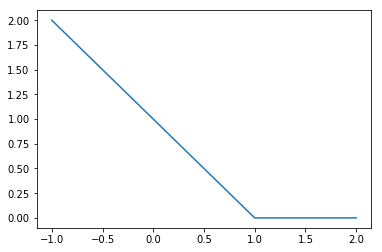

In [24]:
import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = -1, 2
xx = np.linspace(xmin, xmax, 100)
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), label="Hinge loss")

In [26]:
THETA = np.array([0,0, 0])
THETA0 = 0


x = np.array([[1,1, 3], [2, 1, 4],[3,1, 5]])
y = np.array([1, 1, 1])

In [56]:
def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    """
    Finds the total hinge loss on a set of data given specific classification
    parameters.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.


    Returns: A real number representing the hinge loss associated with the
    given dataset and parameters. This number should be the average hinge
    loss across all of the points in the feature matrix.
    """
    # Your code here
    summa = 0

    n = len(labels)
    for row in range(n):
        summa += max(0, 1 - labels[row]*(np.dot(theta, feature_matrix[row]) + theta_0))

    return summa/n#pragma: coderesponse end

In [57]:
hinge_loss_full(x, y, THETA, THETA0)

1.0

In [80]:
!cd /home/abdu/Documents/Work/DataScienceandStatistics/Course4/resources_sentiment_analysis/sentiment_analysis
import random
def get_order(n_samples):
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

In [94]:
def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the perceptron algorithm.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """


    if label*(np.dot(current_theta.T, feature_vector) + current_theta_0) <= 0:
        current_theta = current_theta + label*feature_vector
        current_theta_0 = current_theta_0 + label
    
    return (current_theta, current_theta_0)

In [135]:
def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    # Your code here

    n = feature_matrix.shape[0]
    m = feature_matrix.shape[1]

    theta = np.zeros((m))
    theta_0 = 0
    
    for t in range(T):
        for i in get_order(n):
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i],labels[i],theta,theta_0)
        
    return theta, theta_0    
    #pragma: coderesponse end

In [136]:
perceptron(x, y, 10)

(array([2., 1., 4.]), 1)

In [127]:
x1 = np.array([[ 0.31382123,  0.48619225,  0.03534782, -0.10951293,  0.07773078,  0.36117366,
   0.05091706,  0.0499382,   0.27342837,  0.00593473,],
 [-0.03541288, -0.46036455, -0.30101784,  0.0840269,   0.30649049, -0.20405247,
  -0.1588674,   0.26404615, -0.28515552, -0.4082992 ],
 [-0.08700605, -0.19675057,  0.01323402,  0.03653932,  0.36630285,  0.2647706,
   0.45065998, -0.11420092,  0.30669276, -0.02155026],
 [-0.26792582, -0.36238016, -0.46575882, -0.43850379, -0.40258849, -0.25178535,
   0.32683307,  0.37609304,  0.03089014,  0.37886258],
 [ 0.49153918, -0.26320771,  0.34896811,  0.10002739, -0.01148088, -0.49544567,
   0.02470812, -0.20782521,  0.19346144, -0.11045922]])
y1 =  np.array([-1,  1,  1,  1, -1])

In [128]:
perceptron(x1, y1, 5)

(array([-0.92777934, -0.88009966, -0.67209975,  0.13005176,  0.60654344,
         0.19499014,  0.2161674 ,  0.30773224, -0.44535257, -0.32532497]), 0)

In [105]:
# perceptron output is ['-1.1602923', '-0.7821153', '-0.8368407', '-0.3924789', '-0.1025355', '0.1472573', '0.7018679', '0.4197791', '-0.1293069', '0.4618368']